In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Can we use Hough Transforms to generate a grid which will bound boxes as well as inequalities??

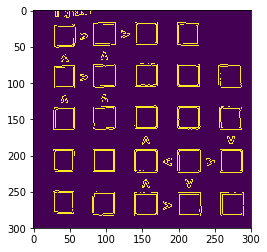

In [17]:
img = cv2.imread('data/img_cropped.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),20,20)

low_threshold = 50
high_threshold = 200
# edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

edges = cv2.Canny(gray,low_threshold,high_threshold,apertureSize = 3)
# _, edges = cv2.threshold(gray, 250, 250, cv2.THRESH_OTSU)
plt.imshow(edges)

# very finely tuned to threshold=82, need to make this applicable to all input files
lines = cv2.HoughLines(edges,1,np.pi/180,82)

In [18]:
lines[1]  # rho, and theta

array([[191.       ,   1.5707964]], dtype=float32)

In [19]:
for line in lines:
    rho, theta = line[0][0], line[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1)

cv2.imwrite('houghlines3.jpg',img)

True

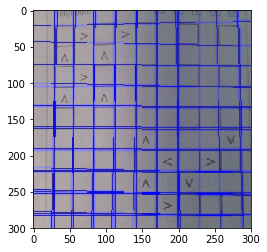

In [20]:
hough_img = cv2.imread('houghlines3.jpg')
plt.imshow(hough_img)

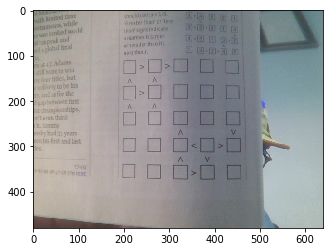

In [204]:
img = cv2.imread('data/img_with_boxes.png')
plt.imshow(img)

In [205]:
h, w, _ = img.shape

In [206]:
img.shape

(480, 640, 3)

In [207]:
# x, y
centre = (w // 2, h // 2)

In [174]:
# img = cv2.circle(img, tl, 10, (255,0,0), 3)

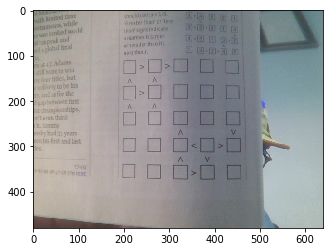

In [209]:
plt.imshow(img)

In [210]:
s_len = 300

In [211]:
tl = (centre[0] - s_len // 2, centre[1] - s_len // 2)

In [212]:
tl

(170, 90)

In [213]:
cropped = img[tl[1]:tl[1] + s_len, tl[0]:tl[0] + s_len]

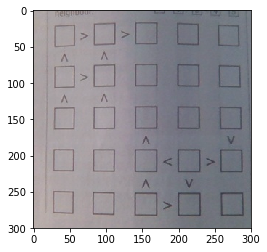

In [214]:
plt.imshow(cropped)

In [215]:
cropped.shape

(300, 300, 3)

In [216]:
cv2.imwrite('data/img_cropped.png', cropped)

True

In [1]:
import datetime

In [ ]:
'2012-06-04T12:00:00'

In [12]:
now = datetime.datetime.now() - datetime.timedelta(minutes=5)
now.strftime("%Y-%m-%dT%H:%M:%S")

'2019-08-19T16:42:10'

In [13]:
import io

In [14]:
from apiclient.http import MediaIoBaseDownload
